<a href="https://colab.research.google.com/github/Mookkyduke/Quiz2/blob/main/633020668_9_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining//covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27




---


### Question
*   ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง?
*   ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)
- สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่
- ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด
- ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด
- ทวีปไหนมีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด
- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย
- ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด
- ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด
- ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด
- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย
- สรุปข้อมูลโควิดประจำวันของประเทศไทย
- สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์


---



ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง?

In [6]:
# หาขนาดข้อมูล
df.shape

(49068, 10)

In [7]:
# หาตัวแปร
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [10]:
df['Date'].min()

Timestamp('2020-01-22 00:00:00')

สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่

In [11]:
df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
WHO Region        False
dtype: bool

In [12]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [13]:
df['Confirmed']
# หาค่าผลรวมของจำนวนเคส (Confirmed) ของแต่ละทวีป
sum_Confirmed = df.groupby('WHO Region')['Confirmed'].sum()
sum_Confirmed

WHO Region
Africa                    21791827
Americas                 402261194
Eastern Mediterranean     74082892
Europe                   248879793
South-East Asia           55118365
Western Pacific           26374411
Name: Confirmed, dtype: int64

In [14]:
sum_Confirmed.idxmax()

'Americas'

ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [15]:
df['Recovered']
# หาค่าผลรวมของจำนวนผู้หายติด (Recovered) ของแต่ละทวีป
sum_Recovered = df.groupby('WHO Region')['Recovered'].sum()
sum_Recovered

WHO Region
Africa                    11193730
Americas                 157069444
Eastern Mediterranean     48050703
Europe                   123202075
South-East Asia           30030327
Western Pacific           18861950
Name: Recovered, dtype: int64

In [16]:
sum_Recovered.idxmax()

'Americas'

ทวีปไหนมีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [17]:
df['Deaths']
# หาค่าผลรวมของจำนวนผู้เสียชีวิต (Deaths) ของแต่ละทวีป
sum_Deaths = df.groupby('WHO Region')['Deaths'].sum()
sum_Deaths

WHO Region
Africa                     439978
Americas                 19359292
Eastern Mediterranean     1924029
Europe                   19271040
South-East Asia           1458134
Western Pacific            932430
Name: Deaths, dtype: int64

In [18]:
sum_Deaths.idxmax()

'Americas'

สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

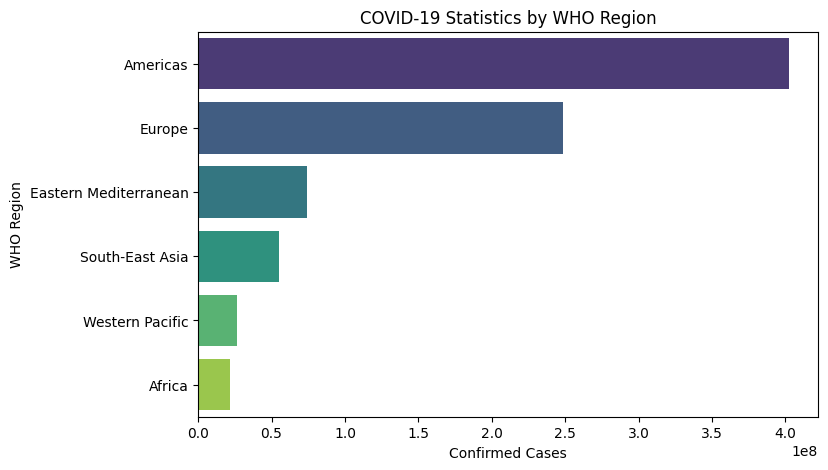

In [36]:
df = pd.DataFrame(df)

# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Confirmed ในแต่ละ WHO Region
grouped_data = df.groupby('WHO Region')['Confirmed'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Confirmed', ascending=False)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Confirmed', y='WHO Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel('Confirmed Cases')

# แสดงกราฟ
plt.show()

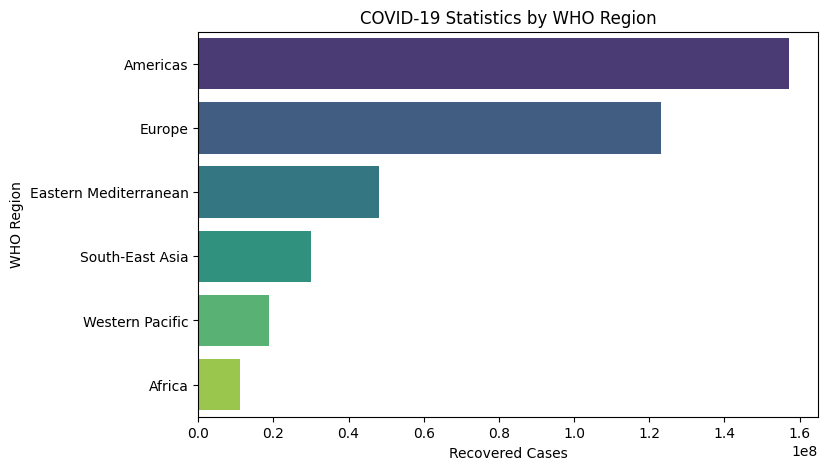

In [35]:
# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Recovered ในแต่ละ WHO Region
grouped_data = df.groupby('WHO Region')['Recovered'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Recovered', ascending=False)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Recovered', y='WHO Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel('Recovered Cases')

# แสดงกราฟ
plt.show()

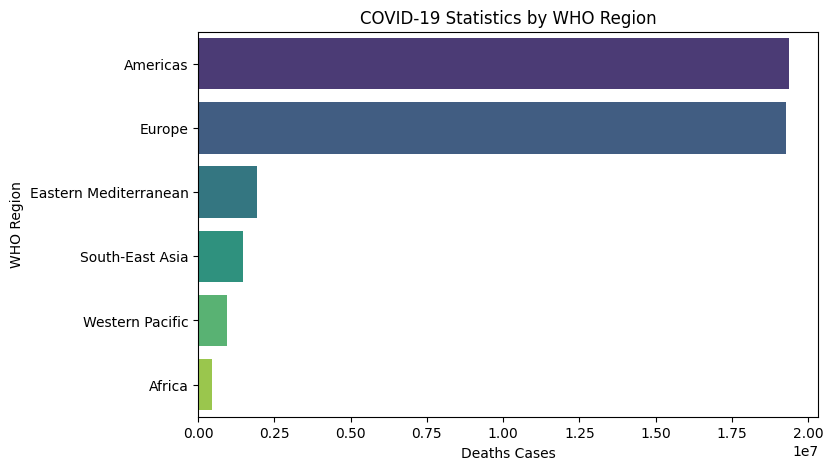

In [34]:
# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Deaths ในแต่ละ WHO Region
grouped_data = df.groupby('WHO Region')['Deaths'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Deaths', ascending=False)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Deaths', y='WHO Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel('Deaths Cases')

# แสดงกราฟ
plt.show()

ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [37]:
# หาค่าผลรวมของจำนวนเคส (Confirmed) ของแต่ละประเทศ
sum_Confirmed_by_country = df.groupby('Country/Region')['Confirmed'].sum()
sum_Confirmed_by_country

Country/Region
Afghanistan           1936390
Albania                196702
Algeria               1179755
Andorra                 94404
Angola                  22662
                       ...   
West Bank and Gaza     233461
Western Sahara            901
Yemen                   67180
Zambia                 129421
Zimbabwe                50794
Name: Confirmed, Length: 187, dtype: int64

In [38]:
# ระบุประเทศที่มีจำนวนเคส (Confirmed) มากที่สุด
sum_Confirmed_by_country.idxmax()

'US'

ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [39]:
# หาค่าผลรวมของผู้เสียชีวิต (Deaths) ของแต่ละประเทศ
sum_Deaths_by_country = df.groupby('Country/Region')['Deaths'].sum()
sum_Deaths_by_country

Country/Region
Afghanistan           49098
Albania                5708
Algeria               77972
Andorra                5423
Angola                 1078
                      ...  
West Bank and Gaza     1370
Western Sahara           63
Yemen                 17707
Zambia                 2643
Zimbabwe                881
Name: Deaths, Length: 187, dtype: int64

In [40]:
# ระบุประเทศที่มีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด
sum_Deaths_by_country.idxmax()

'US'

ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [41]:
# หาค่าผลรวมของจำนวนผู้หายติด (Recovered) ของแต่ละประเทศ
sum_Recovered_by_country = df.groupby('Country/Region')['Recovered'].sum()
sum_Recovered_by_country

Country/Region
Afghanistan           798240
Albania               118877
Algeria               755897
Andorra                69074
Angola                  6573
                       ...  
West Bank and Gaza     61124
Western Sahara           648
Yemen                  23779
Zambia                 83611
Zimbabwe               12207
Name: Recovered, Length: 187, dtype: int64

In [42]:
# ระบุประเทศที่มีจำนวนผู้หายติด (Recovered) มากที่สุด
sum_Recovered_by_country.idxmax()

'US'

สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

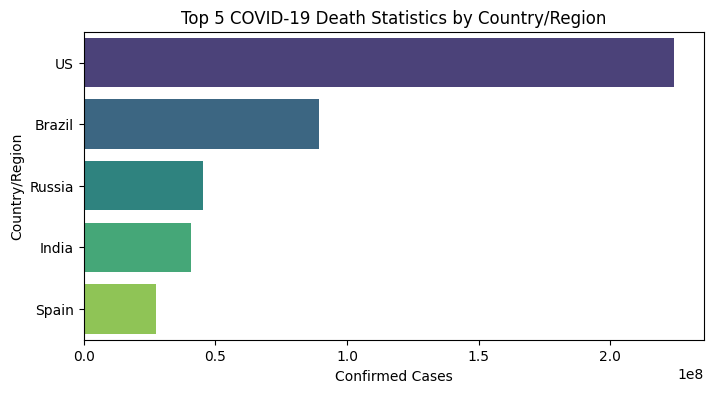

In [45]:
# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Confirmed ในแต่ละ Country/Region
grouped_data = df.groupby('Country/Region')['Confirmed'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Confirmed', ascending=False).head(5)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Confirmed', y='Country/Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('Top 5 COVID-19 Death Statistics by Country/Region')
plt.xlabel('Confirmed Cases')

# แสดงกราฟ
plt.show()

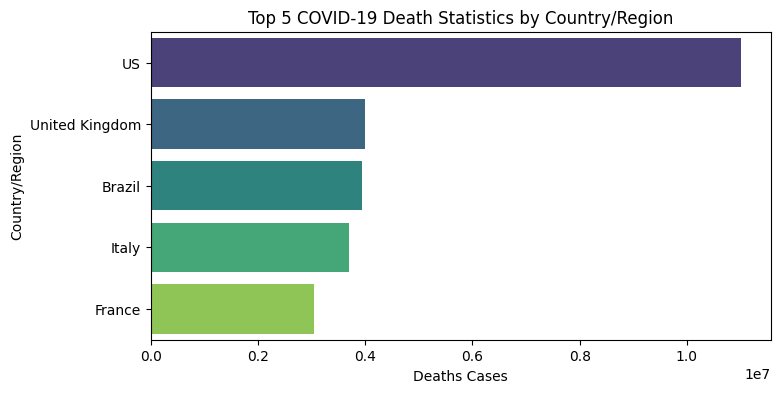

In [47]:
# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Deaths ในแต่ละ Country/Region
grouped_data = df.groupby('Country/Region')['Deaths'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Deaths', ascending=False).head(5)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Deaths', y='Country/Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('Top 5 COVID-19 Death Statistics by Country/Region')
plt.xlabel('Deaths Cases')

# แสดงกราฟ
plt.show()

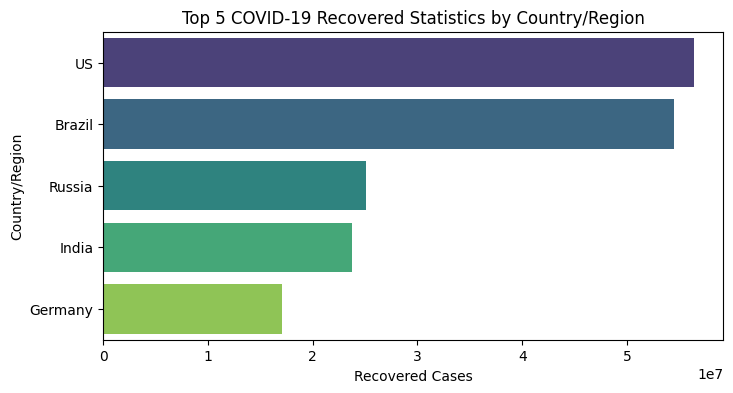

In [48]:
# ใช้ groupby() และ sum() เพื่อรวมผลรวมของ Recovered ในแต่ละ Country/Region
grouped_data = df.groupby('Country/Region')['Recovered'].sum()

# แปลงผลลัพธ์จาก Series เป็น DataFrame และเรียงลำดับ
grouped_df = grouped_data.reset_index().sort_values(by='Recovered', ascending=False).head(5)

# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Recovered', y='Country/Region', data=grouped_df, palette='viridis')

# กำหนดชื่อกราฟและแกน
plt.title('Top 5 COVID-19 Recovered Statistics by Country/Region')
plt.xlabel('Recovered Cases')

# แสดงกราฟ
plt.show()

สรุปข้อมูลโควิดประจำวันของประเทศไทย

In [49]:
df_thailand = df[(df['Country/Region']=='Thailand')]
df_thailand

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


In [52]:
df_thailand.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000
mean,1.587003e+01,1.009925e+02,1949.611702,33.452128,1661.489362,254.670213
std,3.562200e-15,1.424880e-14,1388.252687,26.313268,1378.750684,408.483772
min,1.587003e+01,1.009925e+02,2.000000,0.000000,0.000000,2.000000
25%,1.587003e+01,1.009925e+02,50.000000,1.000000,31.000000,22.750000
50%,1.587003e+01,1.009925e+02,2907.000000,51.000000,2547.000000,78.000000
75%,1.587003e+01,1.009925e+02,3125.000000,58.000000,2982.500000,177.000000
max,1.587003e+01,1.009925e+02,3297.000000,58.000000,3111.000000,1451.000000


In [57]:
df_thailand.shape

(188, 10)

<ipython-input-61-9f3caf0561e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thailand['Date'] = pd.to_datetime(df_thailand['Date'])


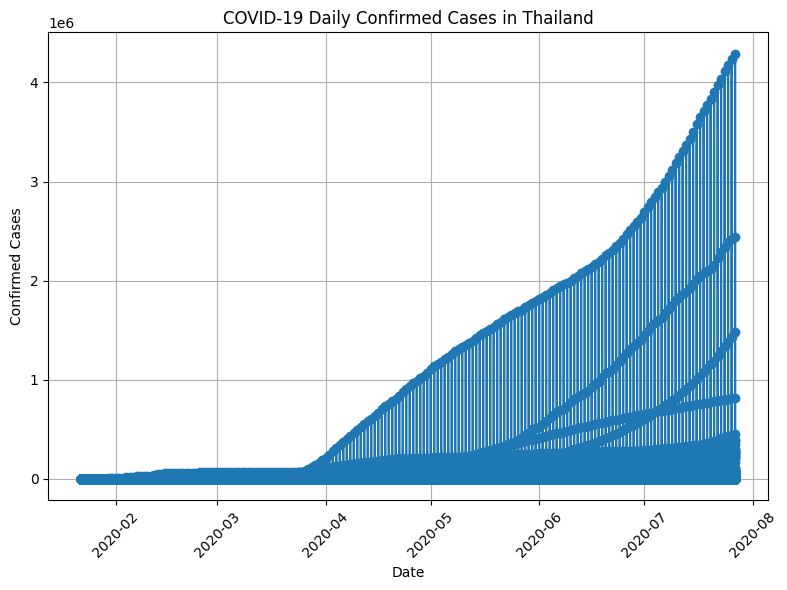

            Date  Confirmed  Deaths  Recovered
207   2020-01-22          2       0          0
468   2020-01-23          3       0          0
729   2020-01-24          5       0          0
990   2020-01-25          7       0          0
1251  2020-01-26          8       0          2
...          ...        ...     ...        ...
47970 2020-07-23       3279      58       3107
48231 2020-07-24       3279      58       3107
48492 2020-07-25       3282      58       3109
48753 2020-07-26       3291      58       3109
49014 2020-07-27       3297      58       3111

[188 rows x 4 columns]


In [61]:
# แปลงคอลัมน์ 'Date' เป็นรูปแบบวันที่
df_thailand['Date'] = pd.to_datetime(df_thailand['Date'])

# สร้างกราฟแสดงผู้ติดเชื้อในแต่ละวัน
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Confirmed'], marker='o')
plt.title('COVID-19 Daily Confirmed Cases in Thailand')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# แสดงตารางข้อมูลโควิด-19 ประจำวันของประเทศไทย
print(df_thailand[['Date', 'Confirmed', 'Deaths', 'Recovered']])

สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์

Summary before Songkran:
Confirmed    366527
Deaths         6289
Recovered    312360
dtype: int64

Summary during Songkran:
Confirmed    0.0
Deaths       0.0
Recovered    0.0
dtype: float64

Summary after Songkran:
Confirmed    0.0
Deaths       0.0
Recovered    0.0
dtype: float64


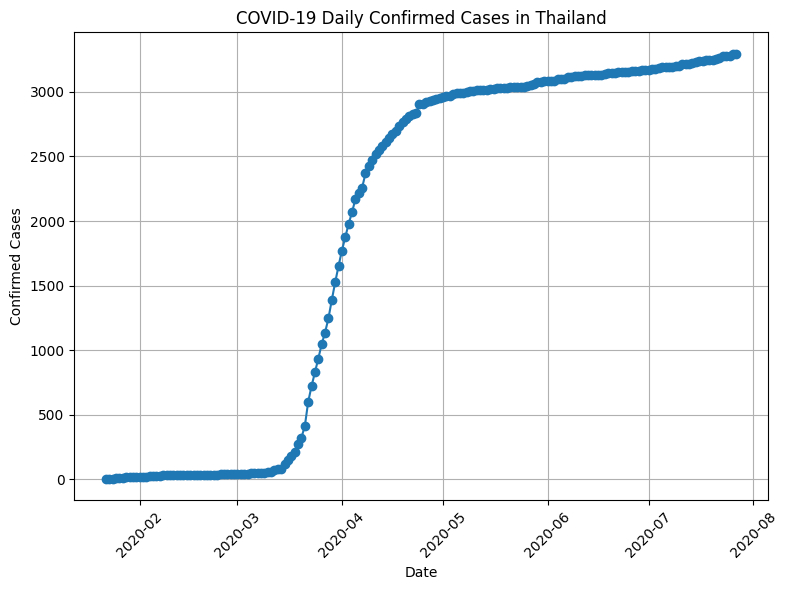

In [60]:
# กรองข้อมูลในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ (ก่อน 13 เมษายน)
before_songkran = df_thailand[df_thailand['Date'] < pd.to_datetime('2023-04-13')]

# กรองข้อมูลในช่วงเทศกาลสงกรานต์ (13-18 เมษายน)
during_songkran = df_thailand[(df_thailand['Date'] >= pd.to_datetime('2023-04-13')) & (df_thailand['Date'] <= pd.to_datetime('2023-04-18'))]

# กรองข้อมูลในช่วงหลังเทศกาลสงกรานต์หนึ่งสัปดาห์ (หลัง 18 เมษายน)
after_songkran = df_thailand[df_thailand['Date'] > pd.to_datetime('2023-04-18')]

# สรุปข้อมูลสถิติของผู้ติดเชื้อ, ผู้เสียชีวิต, และผู้รักษาหายในแต่ละช่วง
summary_before = before_songkran[['Confirmed', 'Deaths', 'Recovered']].sum()
summary_during = during_songkran[['Confirmed', 'Deaths', 'Recovered']].sum()
summary_after = after_songkran[['Confirmed', 'Deaths', 'Recovered']].sum()

# แสดงผลสรุปข้อมูลโควิด-19 ในแต่ละช่วง
print("Summary before Songkran:")
print(summary_before)
print("\nSummary during Songkran:")
print(summary_during)
print("\nSummary after Songkran:")
print(summary_after)

# สร้างกราฟแสดงจำนวนผู้ติดเชื้อในแต่ละวัน
plt.figure(figsize=(8, 6))
plt.plot(df_thailand['Date'], df_thailand['Confirmed'], marker='o')
plt.title('COVID-19 Daily Confirmed Cases in Thailand')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()